In [1]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
import tensorflow as tf
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12901632383598096455
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14328594432
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16224237156095640338
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
device_name = tf.test.gpu_device_name()
if len(device_name)>0:
    print(f'GPU has been found... device name is{device_name}')
else:
    print('No GPU has been found...')

GPU has been found... device name is/device:GPU:0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#load data(sometimes need to use "/")
#df = pd.read_csv('D:/pythonData/python_demo_data/Stress.csv')
# Colab
df = pd.read_csv('/content/drive/MyDrive/1112DL作業/Netflix_Lags_3.csv')
df

,Date,Close,close_Lag1,close_Lag2,close_Lag3
0,2019-05-23,352.209991,359.730011,354.269989,348.109985
1,2019-05-24,354.390015,352.209991,359.730011,354.269989
2,2019-05-28,355.059998,354.390015,352.209991,359.730011
3,2019-05-29,349.190002,355.059998,354.390015,352.209991
4,2019-05-30,351.850006,349.190002,355.059998,354.390015
...,...,...,...,...,...
1000,2023-05-12,339.890015,344.760010,335.420013,332.140015
1001,2023-05-15,335.890015,339.890015,344.760010,335.420013
1002,2023-05-16,333.750000,335.890015,339.890015,344.760010
1003,2023-05-17,339.959991,333.750000,335.890015,339.890015


In [6]:
Forecast_train_data=df.iloc[0:846+1,:].copy()
Forecast_train_data

#資料編號 0 - 845（2019.May.18 - 2022.Sep）

,Date,Close,close_Lag1,close_Lag2,close_Lag3
0,2019-05-23,352.209991,359.730011,354.269989,348.109985
1,2019-05-24,354.390015,352.209991,359.730011,354.269989
2,2019-05-28,355.059998,354.390015,352.209991,359.730011
3,2019-05-29,349.190002,355.059998,354.390015,352.209991
4,2019-05-30,351.850006,349.190002,355.059998,354.390015
...,...,...,...,...,...
842,2022-09-26,224.070007,226.410004,237.050003,236.869995
843,2022-09-27,224.360001,224.070007,226.410004,237.050003
844,2022-09-28,245.199997,224.360001,224.070007,226.410004
845,2022-09-29,239.710007,245.199997,224.360001,224.070007


In [7]:
Forecast_test_data=df.iloc[847:1004+1,:].copy()
Forecast_test_data

#資料編號 846 - 1003（2022.Oct - 2023.May.18）

,Date,Close,close_Lag1,close_Lag2,close_Lag3
847,2022-10-03,239.039993,235.440002,239.710007,245.199997
848,2022-10-04,240.740005,239.039993,235.440002,239.710007
849,2022-10-05,236.729996,240.740005,239.039993,235.440002
850,2022-10-06,240.020004,236.729996,240.740005,239.039993
851,2022-10-07,224.750000,240.020004,236.729996,240.740005
...,...,...,...,...,...
1000,2023-05-12,339.890015,344.760010,335.420013,332.140015
1001,2023-05-15,335.890015,339.890015,344.760010,335.420013
1002,2023-05-16,333.750000,335.890015,339.890015,344.760010
1003,2023-05-17,339.959991,333.750000,335.890015,339.890015


In [8]:
# Rolling 1
Rol_training_1=Forecast_train_data.iloc[0:342+1,:].copy()
Rol_val_1=Forecast_train_data.iloc[343:508+1,:].copy()

# Rolling 2
Rol_training_2=Forecast_train_data.iloc[175:508+1,:].copy()
Rol_val_2=Forecast_train_data.iloc[509:678+1,:].copy()

# Rolling 3
Rol_training_3=Forecast_train_data.iloc[343:678+1,:].copy()
Rol_val_3=Forecast_train_data.iloc[679:846+1,:].copy()

In [46]:
'''
#Rolling 1
#set x (make prediction)
# Train
x_train=Rol_training_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train.columns=['close_Lag1','close_Lag2','close_Lag3']

# Validation
x_val=Rol_val_1.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingV=MMscaler.fit_transform(x_val)
scaled_x_val=pd.DataFrame(data=scalingV)
scaled_x_val.columns=['close_Lag1','close_Lag2','close_Lag3']

#set y (want to predict)
y_train=Rol_training_1['Close'].copy()
y_val=Rol_val_1['Close'].copy()
'''
'''
#Rolling 2
#set x (make prediction)
# Train
x_train=Rol_training_2.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train.columns=['close_Lag1','close_Lag2','close_Lag3']

# Validation
x_val=Rol_val_2.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingV=MMscaler.fit_transform(x_val)
scaled_x_val=pd.DataFrame(data=scalingV)
scaled_x_val.columns=['close_Lag1','close_Lag2','close_Lag3']

#set y (want to predict)
y_train=Rol_training_2['Close'].copy()
y_val=Rol_val_2['Close'].copy()
'''

#set x (make prediction) Rolling 3
# Train
x_train=Rol_training_3.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingT=MMscaler.fit_transform(x_train)
scaled_x_train=pd.DataFrame(data=scalingT)
scaled_x_train.columns=['close_Lag1','close_Lag2','close_Lag3']

# Validation
x_val=Rol_val_3.drop(['Date','Close'],axis=1).copy()
#minimax scaling
MMscaler=MinMaxScaler(feature_range=(0, 1))
scalingV=MMscaler.fit_transform(x_val)
scaled_x_val=pd.DataFrame(data=scalingV)
scaled_x_val.columns=['close_Lag1','close_Lag2','close_Lag3']

#set y (want to predict)
y_train=Rol_training_3['Close'].copy()
y_val=Rol_val_3['Close'].copy()


In [8]:
from keras.losses import mse
from keras.backend import sqrt

def my_RMSE(y_true, y_pred):
    return sqrt(mse(y_true, y_pred))

# Register custom object
#from keras.utils.generic_utils import get_custom_objects for pc
from tensorflow.keras.saving import get_custom_objects
get_custom_objects().update({'my_RMSE': my_RMSE})

In [11]:
# Some self define functions for building deep neural networks
def dense_generator(model_name,layers,last_layer_neurons,activation_fun='relu'):
    n=last_layer_neurons
    neurons=n
    for i in range(0,layers):
        neurons=neurons*2
        model_name.add(Dense(units=neurons, activation=activation_fun))

In [59]:
# Add 6 dense layers
#dense_generator(model,5,6)
# Add dropout layer
#model.add(Dropout(rate=0.2))
# Add 6 dense layers
#dense_generator(model,5,192)
# with tf.device(device_name):
#dense_generator(model,6,6)
#model.add(Dropout(rate=0.2))
#dense_generator(model,6,384)
#model.add(Dropout(rate=0.25))


#--------------------------------------------------
# Create the model
clear.clear_session()
model=Sequential()

# Add input layer & first hidden layer------------------- close_lags 1-3
model.add(Dense(units=6, input_dim=3, activation='relu'))

model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=24, activation='relu'))
model.add(Dense(units=48, activation='relu'))
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=192, activation='linear'))
model.add(Dense(units=384, activation='linear'))
model.add(Dense(units=768, activation='linear'))
model.add(Dense(units=1536, activation='linear'))
model.add(Dense(units=3072, activation='linear'))
model.add(Dropout(rate=0.25))

'''
model.add(Dense(units=12, activation='softmax'))
model.add(Dense(units=24, activation='relu'))
model.add(Dense(units=48, activation='linear'))
model.add(Dense(units=96, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=192, activation='softmax'))
model.add(Dense(units=384, activation='relu'))
model.add(Dense(units=768, activation='linear'))
model.add(Dense(units=1536, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=3072, activation='softmax'))
model.add(Dense(units=6144, activation='relu'))
model.add(Dense(units=12288, activation='linear'))
model.add(Dense(units=24576, activation='relu'))
'''


# Add output softmax layer----------------------
model.add(Dense(units=1, activation='linear'))

# Compile the defined Net
opt=Adam(learning_rate=0.01,beta_1=0.9)
#改成rmse
model.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dense_4 (Dense)             (None, 96)                4704      
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_5 (Dense)             (None, 192)               1

In [ ]:
scaled_x_train

In [ ]:
y_train

In [ ]:
y_val

In [60]:
# 7.1 Store in the history for more useful information
history=model.fit(scaled_x_train, y_train, epochs=100, batch_size=64,verbose=1,validation_data=(scaled_x_val, y_val))

Epoch 1/100
6/6 [==============================] - 1s 68ms/step - loss: 2139.0933 - mean_absolute_percentage_error: 396.2905 - val_loss: 39.5798 - val_mean_absolute_percentage_error: 16.5398
Epoch 2/100
6/6 [==============================] - 0s 16ms/step - loss: 262.4377 - mean_absolute_percentage_error: 48.1063 - val_loss: 420.2606 - val_mean_absolute_percentage_error: 184.8289
Epoch 3/100
6/6 [==============================] - 0s 14ms/step - loss: 229.5319 - mean_absolute_percentage_error: 42.4659 - val_loss: 249.8773 - val_mean_absolute_percentage_error: 112.8495
Epoch 4/100
6/6 [==============================] - 0s 13ms/step - loss: 124.7878 - mean_absolute_percentage_error: 23.0885 - val_loss: 378.9571 - val_mean_absolute_percentage_error: 166.1279
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 81.5359 - mean_absolute_percentage_error: 15.0497 - val_loss: 371.9473 - val_mean_absolute_percentage_error: 162.5704
Epoch 6/100
6/6 [=============================

In [61]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

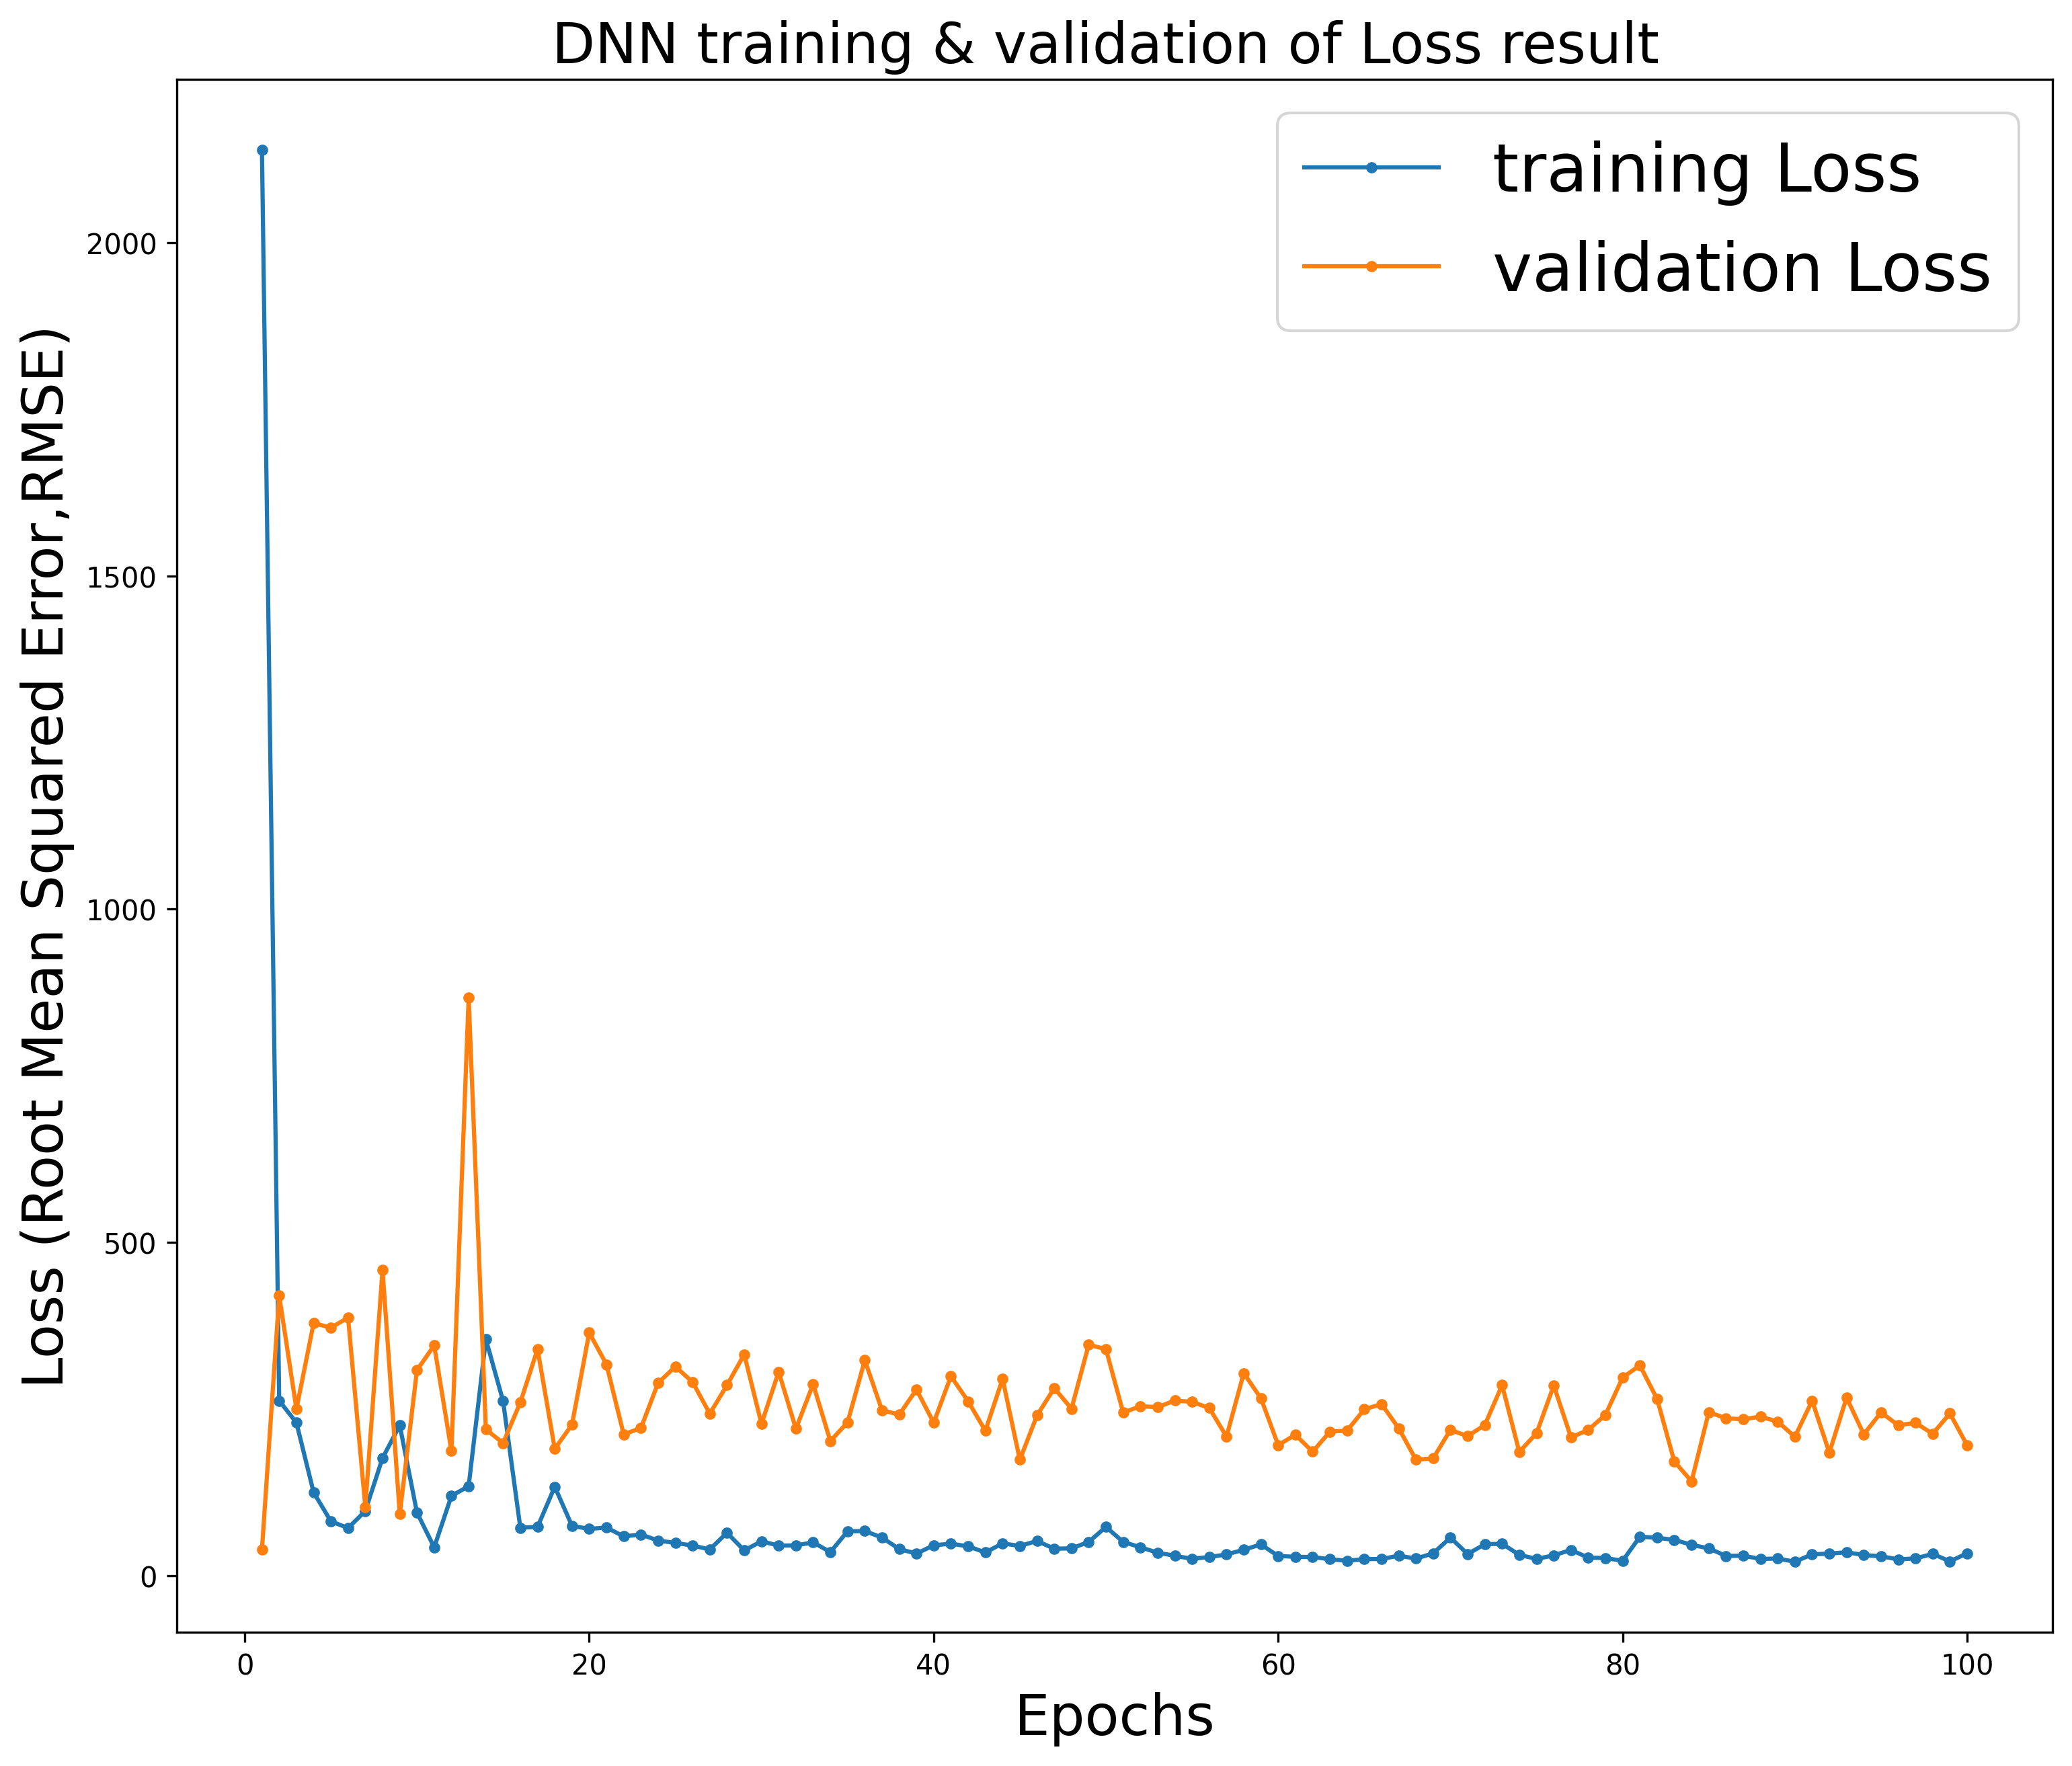

In [62]:
# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Root Mean Squared Error,RMSE)',fontsize=20)
plt.title('DNN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='.',label='training Loss')
plt.plot(epochs, val_loss_values,marker='.',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

# ***Final model***

In [9]:
# X all train data
x_forecast_train=Forecast_train_data.drop(['Date','Close'],axis=1).copy()
# Y all train data
y_forecast_train=Forecast_train_data['Close'].copy()

In [24]:
# Create the model
clear.clear_session()
Fmodel=Sequential()

# Add input layer & first hidden layer------------------- close_lags 1-3
Fmodel.add(Dense(units=6, input_dim=3, activation='relu'))


Fmodel.add(Dense(units=12, activation='softmax'))
Fmodel.add(Dense(units=24, activation='relu'))
Fmodel.add(Dense(units=48, activation='linear'))
Fmodel.add(Dense(units=96, activation='relu'))
Fmodel.add(Dropout(rate=0.2))
Fmodel.add(Dense(units=192, activation='softmax'))
Fmodel.add(Dense(units=384, activation='relu'))
Fmodel.add(Dense(units=768, activation='linear'))
Fmodel.add(Dense(units=1536, activation='relu'))
Fmodel.add(Dropout(rate=0.25))
Fmodel.add(Dense(units=3072, activation='softmax'))
Fmodel.add(Dense(units=6144, activation='relu'))
Fmodel.add(Dense(units=12288, activation='linear'))
Fmodel.add(Dense(units=24576, activation='relu'))
'''
Fmodel.add(Dense(units=12, activation='relu'))
Fmodel.add(Dense(units=48, activation='relu'))
Fmodel.add(Dense(units=24, activation='relu'))
Fmodel.add(Dense(units=96, activation='relu'))
Fmodel.add(Dropout(rate=0.2))
Fmodel.add(Dense(units=192, activation='linear'))
Fmodel.add(Dense(units=384, activation='linear'))
Fmodel.add(Dense(units=768, activation='linear'))
Fmodel.add(Dense(units=1536, activation='linear'))
Fmodel.add(Dense(units=3072, activation='linear'))
Fmodel.add(Dropout(rate=0.25))
'''


# Add output softmax layer----------------------
Fmodel.add(Dense(units=1, activation='linear'))

# Compile the defined Net
opt=Adam(learning_rate=0.001,beta_1=0.9)
#改成rmse
Fmodel.compile(loss='my_RMSE', optimizer=opt, metrics=['mean_absolute_percentage_error'])

# Finally check the model 
Fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 24        
                                                                 
 dense_1 (Dense)             (None, 12)                84        
                                                                 
 dense_2 (Dense)             (None, 24)                312       
                                                                 
 dense_3 (Dense)             (None, 48)                1200      
                                                                 
 dense_4 (Dense)             (None, 96)                4704      
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_5 (Dense)             (None, 192)               1

In [25]:
history=Fmodel.fit(x_forecast_train, y_forecast_train, epochs=100, batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 2s 109ms/step - loss: 272.1663 - mean_absolute_percentage_error: 67.6779
Epoch 2/100
14/14 [==============================] - 2s 108ms/step - loss: 137.3992 - mean_absolute_percentage_error: 37.0410
Epoch 3/100
14/14 [==============================] - 2s 109ms/step - loss: 123.6424 - mean_absolute_percentage_error: 35.2811
Epoch 4/100
14/14 [==============================] - 2s 108ms/step - loss: 115.8345 - mean_absolute_percentage_error: 35.1235
Epoch 5/100
14/14 [==============================] - 2s 108ms/step - loss: 115.0524 - mean_absolute_percentage_error: 34.7108
Epoch 6/100
14/14 [==============================] - 2s 108ms/step - loss: 114.1355 - mean_absolute_percentage_error: 34.9245
Epoch 7/100
14/14 [==============================] - 2s 108ms/step - loss: 115.7819 - mean_absolute_percentage_error: 33.8086
Epoch 8/100
14/14 [==============================] - 2s 108ms/step - loss: 116.4218 - mean_absolute_percentage_error: 

In [ ]:
Fmodel.save('DNN_trained_model1.h5')
print('Model has been saved...')

Model has been saved...


In [ ]:
DNN_model1=keras.models.load_model('/content/DNN_trained_model1.h5')
print('Model successfully loaded...')

Model successfully loaded...


# ***Testing***

In [26]:
# X test
x_forecast_test=Forecast_test_data.drop(['Date','Close'],axis=1).copy()
# Y test
y_forecast_test=Forecast_test_data['Close'].copy()

In [27]:
# 8.1 Make prediction - Model1
prediction=np.round((Fmodel.predict_on_batch(x_forecast_test)),2)
pred_values=[]
for i in range(0,len(prediction)):
    value=prediction[i][0]
    pred_values.append(value)

In [28]:
Results=pd.DataFrame({'Date':Forecast_test_data['Date'],'Y_true':Forecast_test_data['Close'],'Predict':pred_values})
Results['abs Error']=np.abs(Results['Y_true']-Results['Predict'])
Results

,Date,Y_true,Predict,abs Error
847,2022-10-03,239.039993,216.279999,22.759994
848,2022-10-04,240.740005,232.369995,8.370010
849,2022-10-05,236.729996,237.490005,0.760009
850,2022-10-06,240.020004,224.309998,15.710006
851,2022-10-07,224.750000,233.240005,8.490005
...,...,...,...,...
1000,2023-05-12,339.890015,337.260010,2.630005
1001,2023-05-15,335.890015,342.670013,6.779998
1002,2023-05-16,333.750000,332.649994,1.100006
1003,2023-05-17,339.959991,332.230011,7.729980


In [29]:
# Symmetric Mean Absolute Percentage Error (SMAPE)
def SMAPE_calulate(y_true, y_pred):
    n = len(y_true)
    SMAPE=(100 / n) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)))
    return SMAPE

# Relative Absolute Error (RAE)
def RAE_calculate(y_true, y_pred):
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    return RAE

# Mean Relative Absolute Error (MRAE)
def MRAE_calculate(y_true, y_pred):
    n=len(y_true)
    abs_errors = np.abs(y_true - y_pred)
    denominator = np.sum(np.abs(y_true - np.mean(y_true)))
    RAE=np.sum(abs_errors/denominator)
    MRAE=RAE/n
    return MRAE

# Median Relative Absolute Error (MdRAE) comparing with benchmark
# Note: By default, the bench value is the mean of actual value
def MdRAE_calculate(y_true, y_pred, bench=None):
    if bench==None:
        bench=np.mean(y_true)
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE,bench
    else:
        MdRAE=np.median(np.abs(y_true - y_pred)/np.abs(y_true - bench))
        return MdRAE
    
# Relative Squared Error (RSE) & Root Relative Squared Error (RRSE)
def RSE_calculate(y_true, y_pred, Root=False):
    mse = np.mean((y_true - y_pred)**2)
    denominator = np.var(y_true)
    RSE=mse/denominator
    
    if Root==True:
        return np.sqrt(RSE)
    else:
        return RSE

In [17]:
# Functions for evaluation
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import mean_squared_error #MSE,RMSE
from sklearn.metrics import mean_absolute_percentage_error #MAPE

In [30]:
# 8.2 Calculating the mertics
MAE=mean_absolute_error(y_forecast_test,pred_values)
MSE=mean_squared_error(y_forecast_test,pred_values,squared=True)
RMSE=mean_squared_error(y_forecast_test,pred_values,squared=False)
MAPE=mean_absolute_percentage_error(y_forecast_test,pred_values)
SMAPE=SMAPE_calulate(y_forecast_test,pred_values)
RAE=RAE_calculate(y_forecast_test,pred_values)
MRAE=MRAE_calculate(y_forecast_test,pred_values)
MdRAE=MdRAE_calculate(y_forecast_test,pred_values)
RSE=RSE_calculate(y_forecast_test,pred_values,Root=False)
RRSE=RSE_calculate(y_forecast_test,pred_values,Root=True)

print('MAE:',round(MAE,3))
print('MSE:',round(MSE,3))
print('RMSE:',round(RMSE,3))
print('MAPE:',round(MAPE*100,3),'%')
print('SMAPE:',round(SMAPE,3),'%')
print('RAE:',round(RAE,3))
print('MRAE:',MRAE)
print('MdRAE:',round(MdRAE[0],3),'bench:',round(MdRAE[1],3))
print('RSE:',round(RSE,3))
print('RRSE:',round(RRSE,3))

MAE: 10.845
MSE: 249.778
RMSE: 15.804
MAPE: 3.613 %
SMAPE: 3.739 %
RAE: 0.403
MRAE: 0.0025510558930242778
MdRAE: 0.357 bench: 311.386
RSE: 0.213
RRSE: 0.461


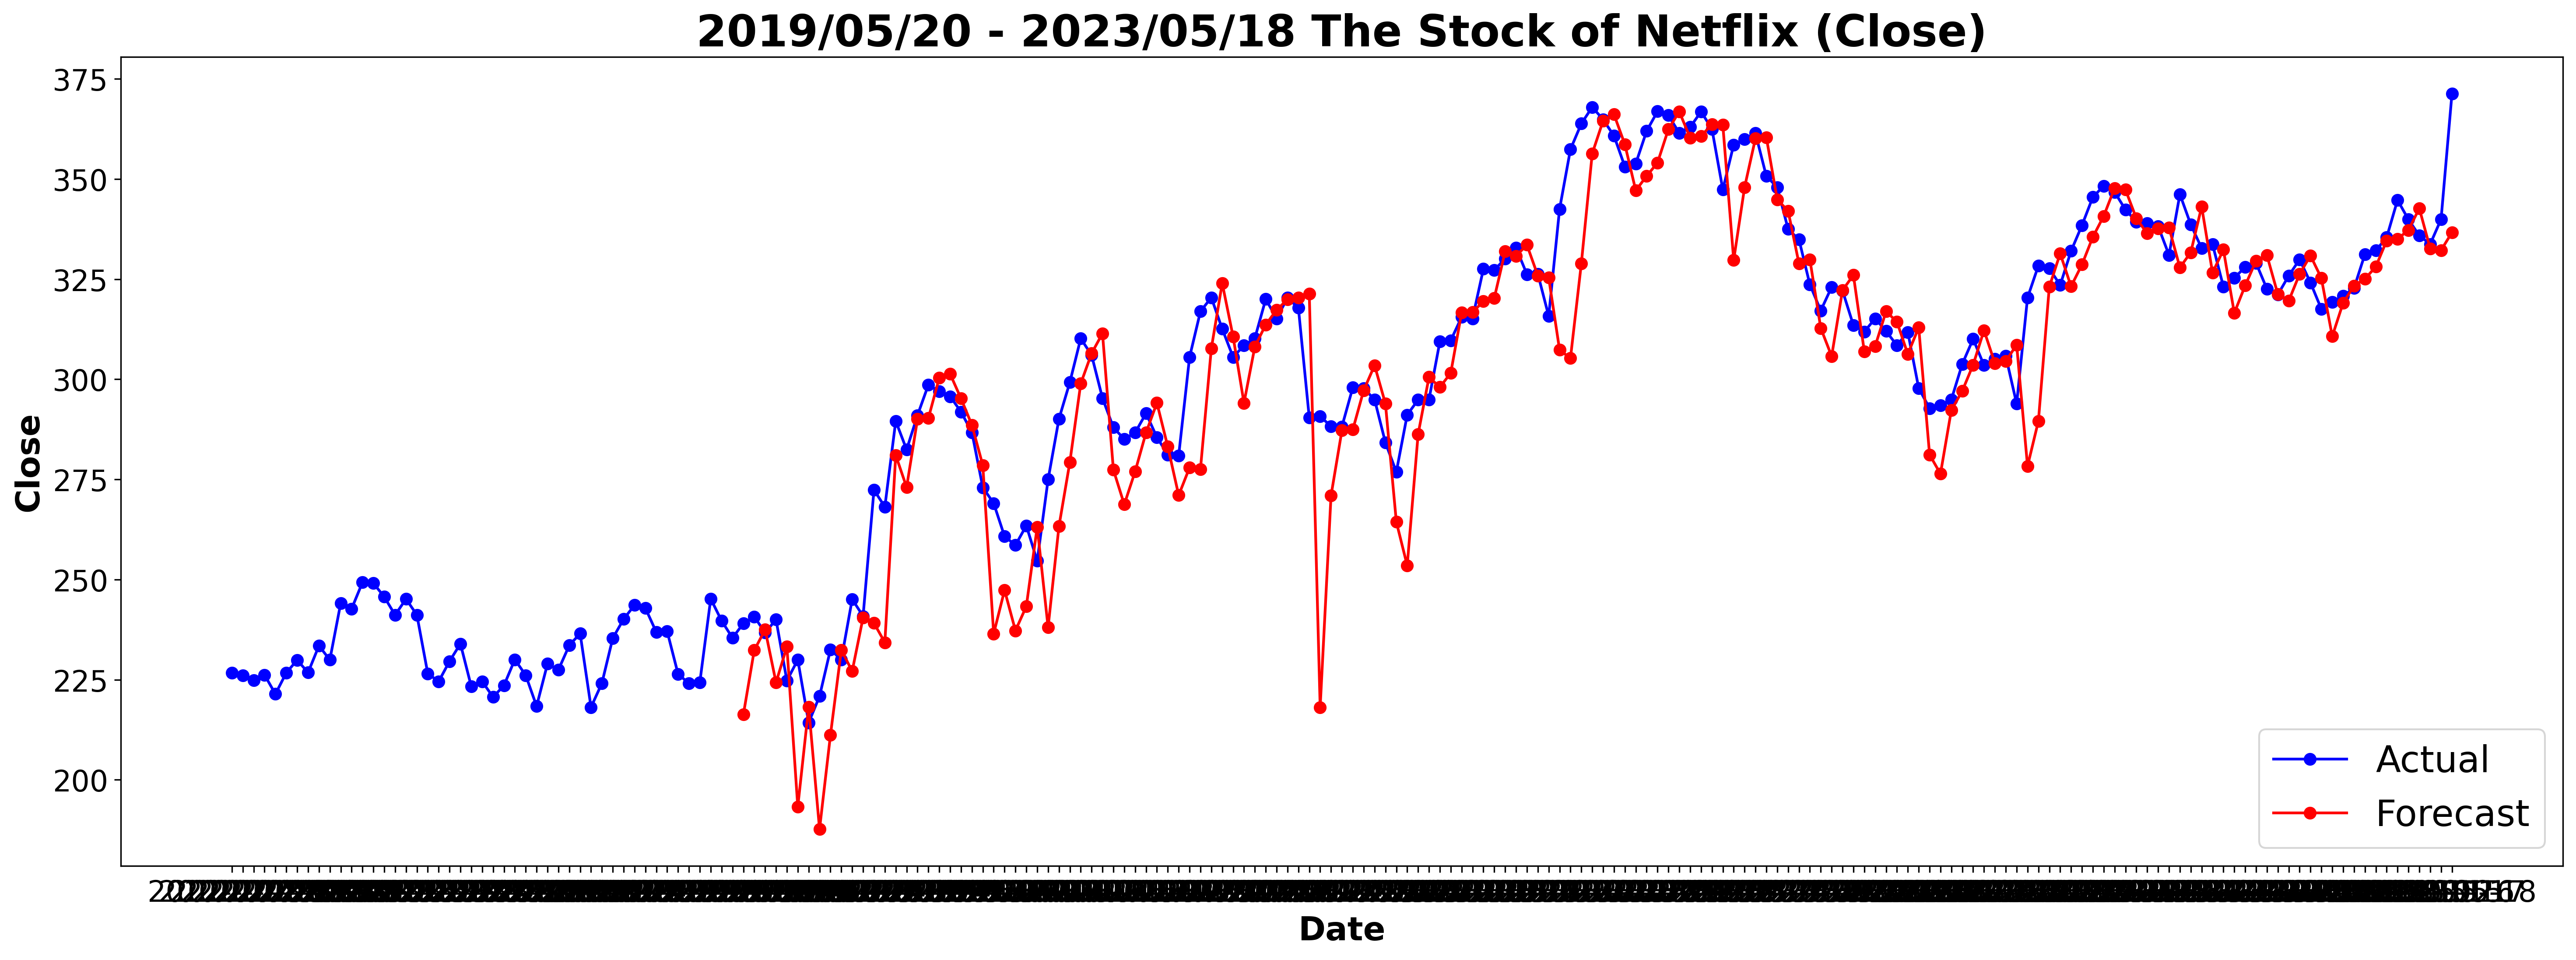

In [33]:
# Plot Y and its corresponding date
# Figure setting
plt.figure(figsize=(24,8),dpi=300)
plt.title('2019/05/20 - 2023/05/18 The Stock of Netflix (Close)',weight='bold',fontsize=24)
plt.xlabel('Date',fontsize=18,weight='bold')
plt.ylabel('Close',fontsize=18,weight='bold')

# Comparison of actual value and predicted value according to Date
plt.plot(df.iloc[800:,0],df.iloc[800:,1],marker='o',color='blue',label='Actual')
#plt.plot(df['Date'],df['Close'],marker='.',color='blue',label='Actual')
plt.plot(Results['Date'],Results['Predict'],marker='o',color='red',label='Forecast')

# Set the axis
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set legends
plt.legend(loc=4,fontsize=20)

plt.show()

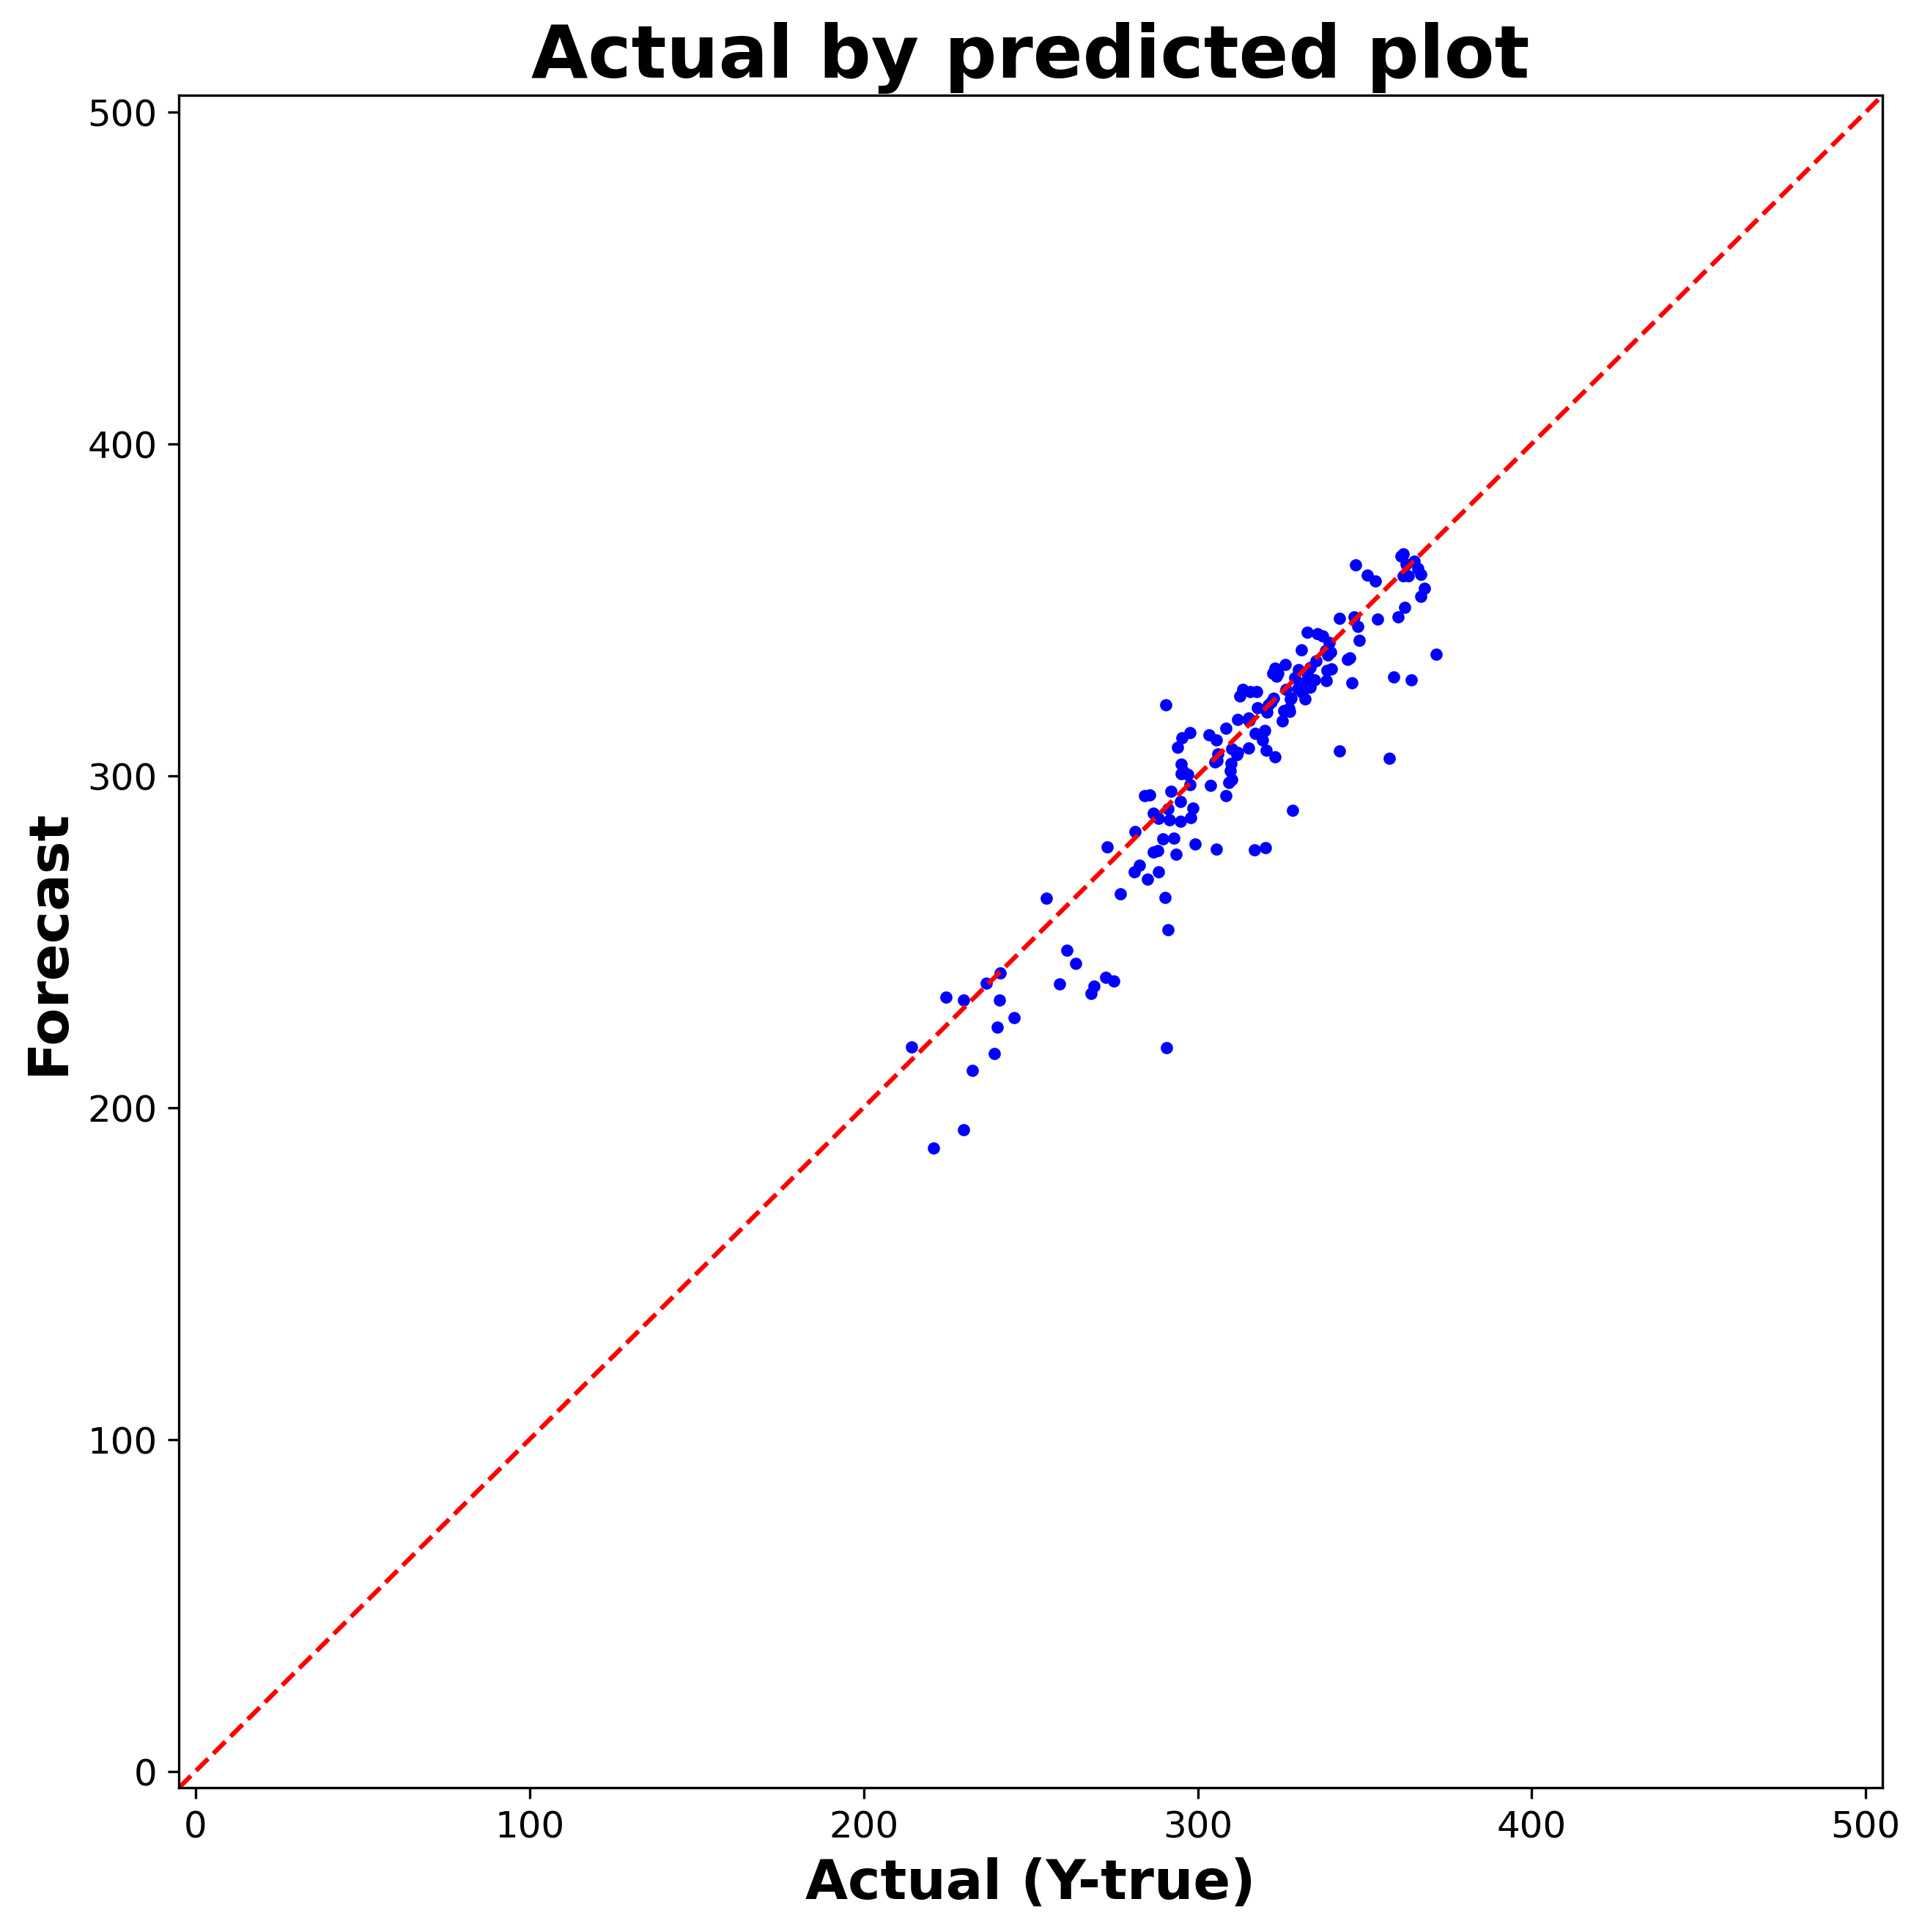

In [32]:
# Lock the scale of axis by Y_true
max_value=500+5
min_value=0-5

# Figure setting
plt.figure(figsize=(10,10),dpi=300)
plt.title('Actual by predicted plot',weight='bold',fontsize=24)
plt.xlabel('Actual (Y-true)',fontsize=18,weight='bold')
plt.ylabel('Forecast',fontsize=18,weight='bold')

# Perfect model reference line
plt.plot([min_value,max_value], [min_value,max_value], linestyle='--',color='red')

# Actual by predicted plot
plt.scatter(Results.iloc[:,1],Results.iloc[:,2],marker='.',color='blue')

# Set the axis
plt.ylim(0-5,max_value)
plt.xlim(0-5,max_value)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()